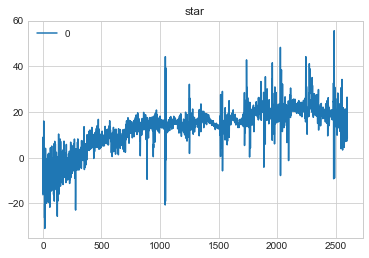

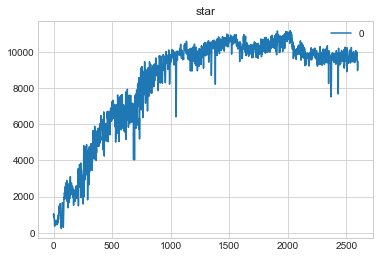

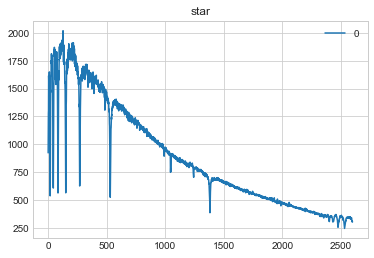

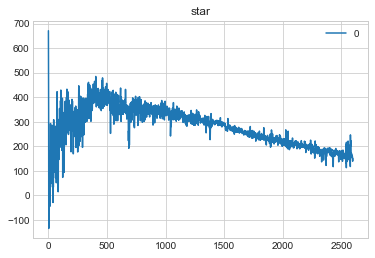

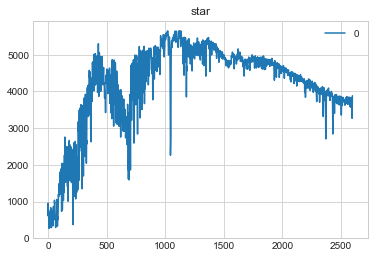

In [1]:
import os, sys
import pandas as pd
import seaborn as sns
import time
sns.set_style('whitegrid')
#数据可视化
path = 'G:\\Python\\Astronomy\\first_train_data_20180131'
dirs = os.listdir(path)
#读取文件名
title = pd.read_csv('G:\\Python\\Astronomy\\first_train_index_20180131.csv', encoding = 'gbk')
import matplotlib.pyplot as plt
%matplotlib inline
o = 1
while o <= 5:
    datum = pd.read_table('G:\\Python\\Astronomy\\first_train_data_20180131\\' + dirs[o-1], sep=',',header = None)
    #读取数据
    datum = datum.T
    #转制
    data = []
    i = len(datum)
    #读取长度
    datum = datum.T
    #转回来
    k = 1
    o = o+1
    while k < i:
        if k % 1==0:
            data.append(datum.iloc[0,k])
            #导入数据
        k = k + 1
    data = pd.DataFrame(data)
    data.plot()
    #画图
    plt.title(title['type'][o-2])
    #图像标题（分类）

In [2]:
print (len(dirs))
#数据长度 （个数）

483851


In [3]:
data= pd.read_csv("G:\\Python\\Astronomy\\first_train_index_20180131.csv",encoding='gbk')
data.head()
#检查数据读取是否成功

,id,type
0,696220,star
1,911466,star
2,915856,star
3,720026,star
4,1198160,star


In [4]:
data.info()
#数据概览

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483851 entries, 0 to 483850
Data columns (total 2 columns):
id      483851 non-null int64
type    483851 non-null object
dtypes: int64(1), object(1)
memory usage: 7.4+ MB


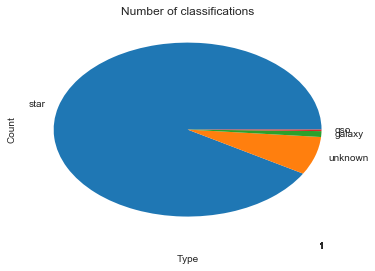

<function seaborn.utils.despine>

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
data['type'].value_counts().plot(kind='pie')
plt.title('Number of classifications')
plt.xlabel('Type')
plt.ylabel('Count')
new_ticks = np.linspace(1,1,20) 
plt.xticks(new_ticks) 
plt.show()
sns.despine
#将数据集中的type按类别画饼状图

In [6]:
data['type'].value_counts()
#具体type个数与数据格式

star       442969
unknown     34288
galaxy       5231
qso          1363
Name: type, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
root_path = "G:\\Python\\Astronomy\\first_train_data_20180131"
id_set = []
feat_set = []
path_set = []
a=500
def get_str_split(value):
    if len(value.split("."))>2:
        return value.split(".")[-2]+value.split(".")[-1]
    else:
        return value
#由于数据中有出现两个小数点的错误数据，对这类数据进行处理
for id_per in (data['id'].tolist()[:a]):
    id_set.append(id_per)  #设置容器，存放数据
    dt = pd.read_table(('%s/%s.txt') % (root_path, id_per), sep=",") #读取文本数据
    dt_values = [get_str_split(col) for col in dt.columns.tolist()]  #检查数据
    feat_set.append(dt_values)
x_train = pd.DataFrame(feat_set)
y_train = data.iloc[:a, :]['type'].values.tolist()
for i in range(len(y_train)):
    if y_train[i] == 'star': y_train[i] = 0
    if y_train[i] == 'qso': y_train[i] = 1
    if y_train[i] == 'galaxy': y_train[i] = 2
    if y_train[i] == 'unknown': y_train[i] = 3
#将type中的文字数据转为使用数字表示
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
#将数据集分为训练集和测试集两部分，比例为28:2
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#将id转换为Float格式

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(x_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 92.00
Time consumed for training: 0.025 seconds
Time consumed for prediction: 0.09558 seconds


In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(x_test)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 44.00
Time consumed for training: 0.022 seconds
Time consumed for prediction: 0.02119 seconds


In [11]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(x_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 91.00
Time consumed for training: 19.413
Time consumed for prediction: 0.02094 seconds


In [14]:
from sklearn.svm import SVC
svc = SVC()
training_start = time.perf_counter()
svc.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(x_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 90.00
Time consumed for training: 1.729 seconds
Time consumed for prediction: 0.15546 seconds


In [15]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'SVC'],
    'Score': [acc_knn, acc_gnb, acc_xgb,  acc_svc,],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time,  
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time,
                          svc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df
#对于各种算法的得分与导入数据、训练数据耗时总结画表

,Score,Runtime Training,Runtime Prediction
Model,,,
KNN,92.0,0.025411,0.095582
XGBoost,91.0,19.412930,0.020944
SVC,90.0,1.728752,0.155463
Naive Bayes,44.0,0.021735,0.021186
